# Analyse de réseaux

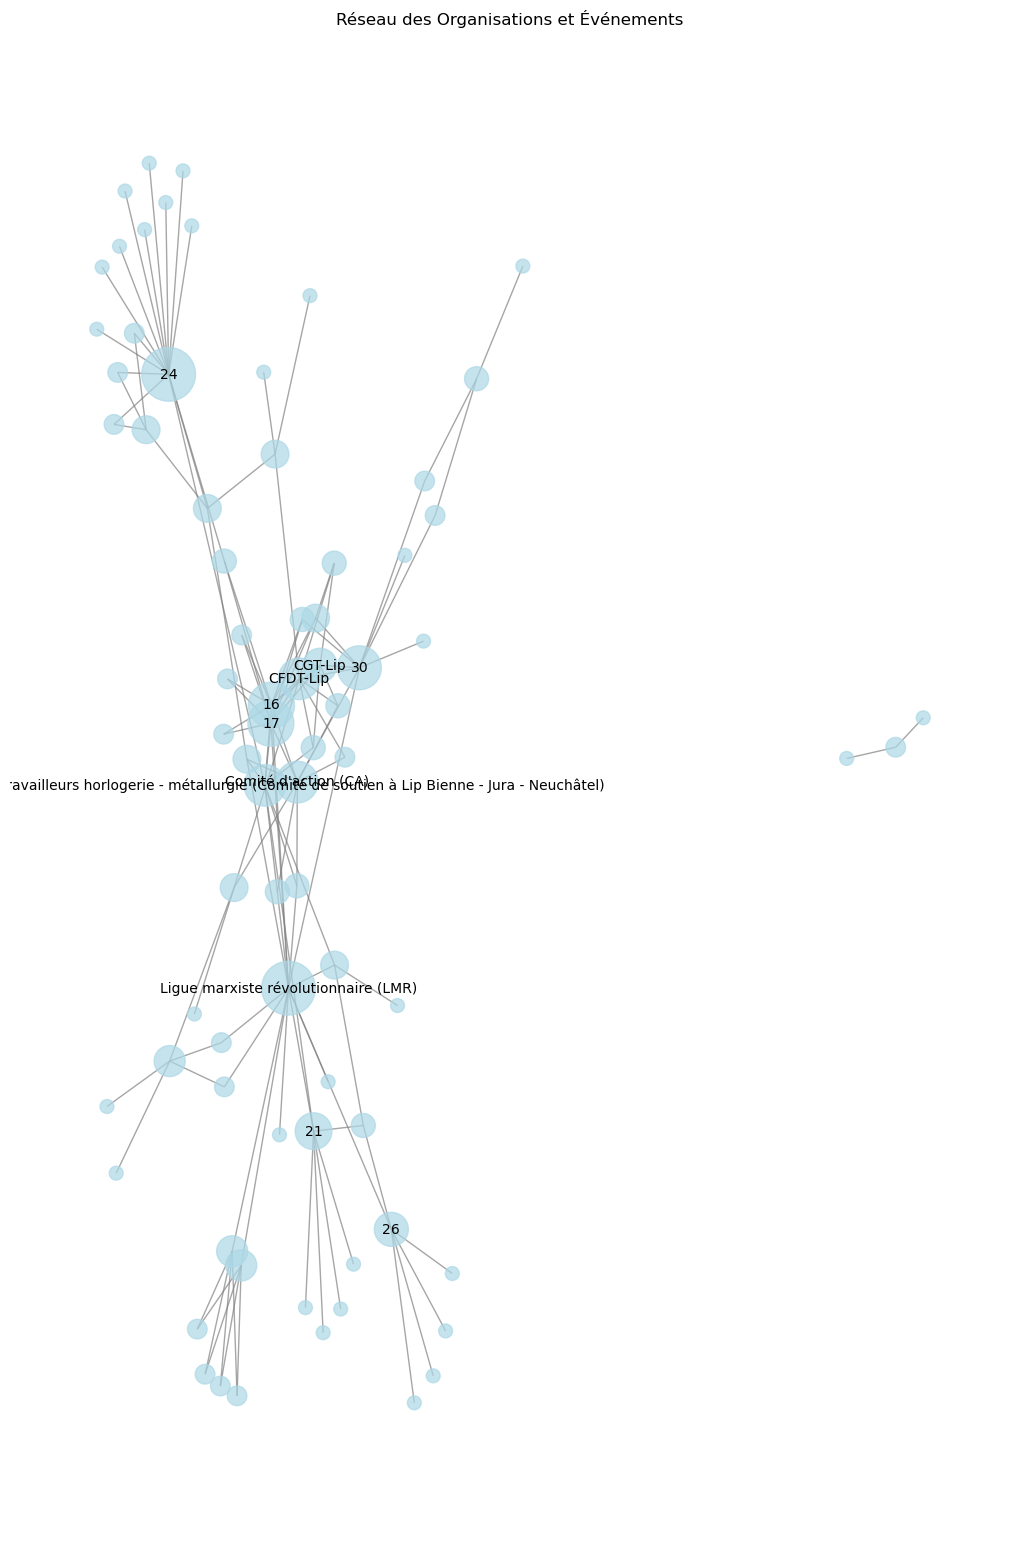

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv('analyse_memoire_reseaux.csv')

# Créer un graphe
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['pk_evenement'], row['nom'])

# Calculer le degré des nœuds
degrees = dict(G.degree())

# Ajuster la taille des nœuds
node_sizes = [degrees[node] * 100 for node in G.nodes()]

# Visualiser le réseau
plt.figure(figsize=(10,15))
pos =  nx.spring_layout(G)

nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color='lightblue', edge_color='gray', alpha=0.7)
# Ajouter des labels pour les nœuds les plus connectés
threshold = 5 # Modifier ce seuil si nécessaire
labels = {node: node for node, degree in degrees.items() if degree > threshold}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

plt.title("Réseau des Organisations et Événements")
plt.show()

In [15]:
degrees = dict(G.degree())

# Afficher les nœuds et leurs degrés
for node, degree in degrees.items():
    print(f"{node}: {degree}")

1: 2
CFDT-Lip: 9
Comité d'action (CA): 9
7: 3
CGT-Lip: 6
Comité de travailleurs horlogerie - métallurgie (Comité de soutien à Lip Bienne - Jura - Neuchâtel): 9
2: 4
Groupe de travailleurs FTMH: 4
Ligue marxiste révolutionnaire section Bienne: 2
Ligue marxiste révolutionnaire section Delémont: 2
Ligue marxiste révolutionnaire section Neuchâtel: 2
6: 2
Groupe de travailleurs Lip: 5
Ligue marxiste révolutionnaire (LMR): 15
8: 1
9: 1
10: 4
Groupe de travailleurs CGT-Lip: 1
11: 3
14: 3
13: 4
15: 3
16: 11
17: 11
FOBB section Jura: 2
Groupe de typographe zürichois: 2
Ligue communiste française: 2
POP section Bienne: 3
Parti socialiste unifié français (PSU): 3
Personnel Lip: 4
18: 3
CGT: 2
POP section La Chaux-de-Fonds: 1
Parti communiste français (PCF): 2
20: 3
21: 7
Action socialiste: 1
Colonies libres italiennes: 1
Jeunesse chrétienne rurale: 1
POP: 3
Parti communiste italien: 1
22: 5
Cartel syndical neuchâtelois: 2
23: 5
Fédération neuchâteloise des travailleurs du commerce,  des transport

In [28]:
import plotly.graph_objects as go

In [31]:
# Créer un graphe
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['nom'], row['pk_evenement'])

# Obtenir les positions des nœuds
pos = nx.spring_layout(G)
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]
edges = G.edges()

# Créer les lignes des arêtes
x_edges = []
y_edges = []
for edge in edges:
    x_edges.append(pos[edge[0]][0])
    x_edges.append(pos[edge[1]][0])
    x_edges.append(None)  # Pour interrompre les lignes
    y_edges.append(pos[edge[0]][1])
    y_edges.append(pos[edge[1]][1])
    y_edges.append(None)

# Créer le graphique
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_edges, y=y_edges, mode='lines', line=dict(width=0.5, color='gray'), hoverinfo='none'))
fig.add_trace(go.Scatter(x=x_nodes, y=y_nodes, mode='markers+text', text=list(G.nodes()), textposition="top center",
                         marker=dict(size=10, color='lightblue', line=dict(width=2, color='DarkSlateGrey')),
                         hoverinfo='text'))

# Configurer la mise en page
fig.update_layout(showlegend=False, hovermode='closest', title="Réseau des Organisations et Événements")
# Sauvegarder le fichier HTML
# fig.write_html('analyse_resaux.html')  # Utilise write_html

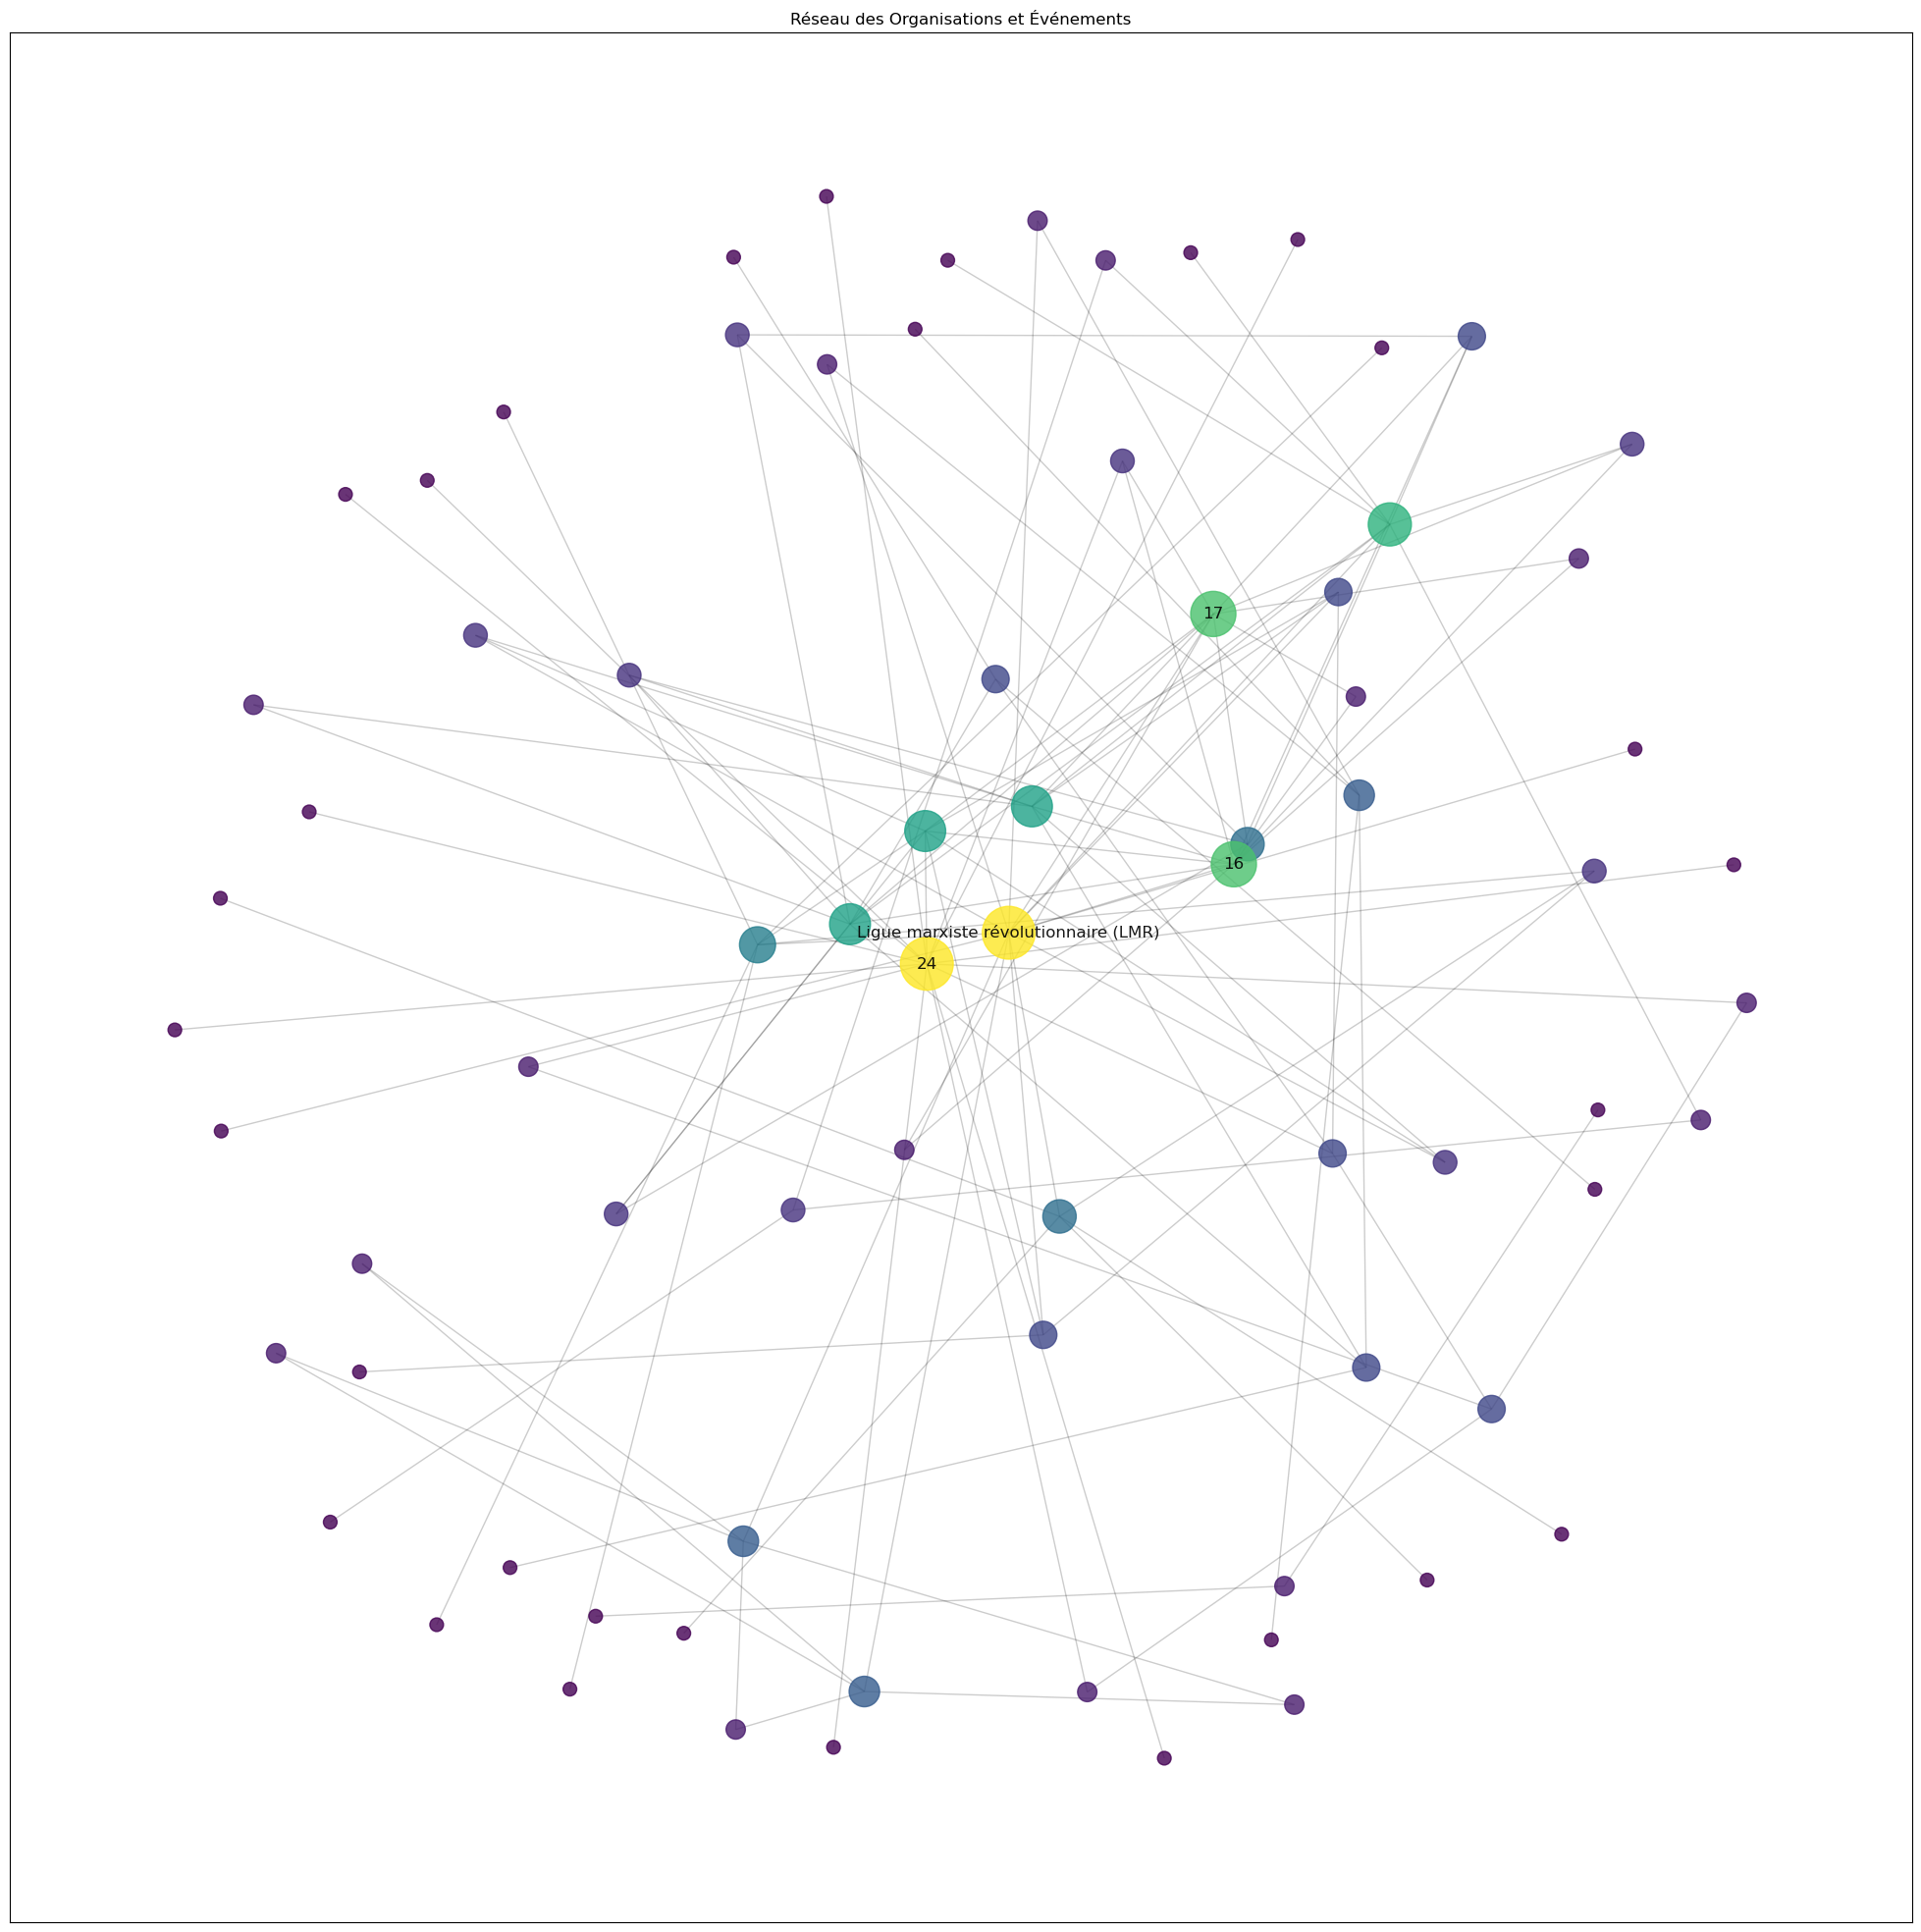

In [40]:
# Créer un graphe
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['pk_evenement'], row['nom'])

# Calculer le degré des nœuds
degrees = dict(G.degree())

# Ajuster la taille des nœuds
node_sizes = [degrees[node] * 100 for node in G.nodes()]  # Taille proportionnelle au degré

# Positionnement des nœuds
pos = nx.spring_layout(G, k=1)

# Récupérer les labels pour les nœuds ayant un degré > 30
labels = {i[0]: i[0] for i in G.nodes(data=True) if degrees[i[0]] > 10}

# Déterminer la couleur des nœuds
node_color = [degrees[node] for node in G.nodes()]

# Visualiser le réseau
plt.figure(figsize=(25, 25))

# Dessiner les nœuds
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_color, 
                         cmap='viridis', alpha=0.8)  # Utilise 'viridis' pour une meilleure visibilité
# Dessiner les arêtes
nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black')

# Dessiner les labels
nx.draw_networkx_labels(G, pos, labels=labels, alpha=0.9, font_size=12)

# Sauvegarder la figure
# f = 'pictures/universites.svg'
# plt.savefig(f, format="svg")
plt.title("Réseau des Organisations et Événements")
plt.show()
